In [0]:
import numpy as np
from tqdm import tqdm

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.layers import Input,Dense,Dropout,Flatten,Conv2D,LeakyReLU
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K


In [0]:
K.set_image_dim_ordering('th')
# th : (depth,input,rows,cols)
# tf : (rows,cols,input,depth)

np.random.seed(1000)
randomDom =100 #10x10


In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()


In [0]:
X_train = (x_train.astype(np.float32) - 127.5)/127.5


In [0]:
X_train = X_train.reshape(-1,784)

In [0]:
adam = Adam(lr=0.0002,beta_1=0.5)


In [0]:
generator = Sequential()
generator.add(Dense(256,input_dim = randomDom))
generator.add(LeakyReLU(0.2))

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784,activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 784)               803600    
Total para

In [0]:
discriminator = Sequential()
discriminator.add(Dense(1024,input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
__________

In [0]:
discriminator.trainable = False
ganInput = Input(shape=(randomDom,))
x = generator(ganInput)
ganOutput = discriminator(x)

gan = Model(input=ganInput,output=ganOutput)
gan.compile(loss = 'binary_crossentropy',optimizer=adam)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


In [0]:
def generateAndPlot():
  num_examples =100
  noise = np.random.normal(0,1,size =[100,randomDom])
  generatedImages = generator.predict(noise)
  generatedImages = generatedImages.reshape(num_examples,28,28)
  plt.figure(figsize=(10,10))
  for i in range(num_examples):
    plt.subplot(10,10,i+1)
    plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
  plt.show()
  

In [0]:
def train(epochs=1,batchSize=128):
  m = X_train.shape[0]
  batchCount = m//batchSize
  generateAndPlot()
  for e in range(epochs):
    print(f'Epochs: {e}')
    for _ in tqdm(range(batchCount)):
      noise = np.random.normal(0,1,size =[batchSize,randomDom])
      generatedImages = generator.predict(noise)
      
      imagesBatch = X_train[np.random.randint(0,m,size=batchSize)]
      
      X = np.concatenate([imagesBatch,generatedImages])
      
      yDis = np.zeros(2*batchSize)
      yDis[:batchSize] = 0.9 #one-sided label smoothing
      
      discriminator.trainable = True
      dLoss = discriminator.train_on_batch(X,yDis)
      discriminator.trainable = False
      
      noise = np.random.normal(0,1,size =[batchSize,randomDom])
      yGan = np.ones(batchSize)
      gLoss = gan.train_on_batch(noise,yGan)
    if e%10 == 0:
      generateAndPlot()
      
      

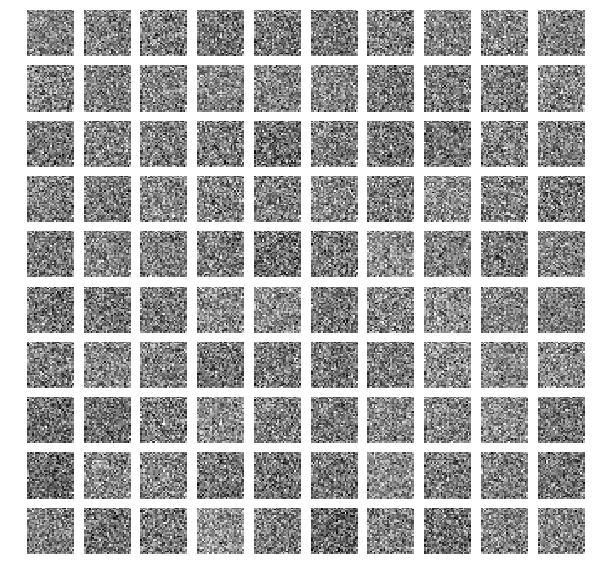

  0%|          | 0/468 [00:00<?, ?it/s]

Epochs: 0


100%|██████████| 468/468 [00:13<00:00, 33.44it/s]


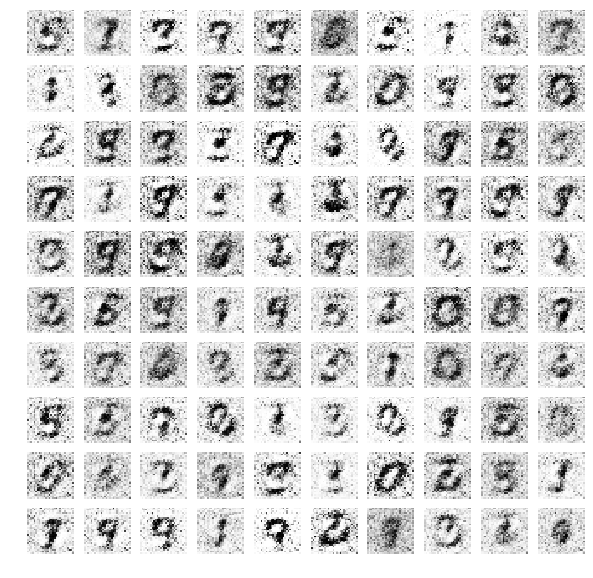

  1%|          | 3/468 [00:00<00:16, 27.38it/s]

Epochs: 1


  1%|          | 5/468 [00:00<00:10, 42.70it/s]

Epochs: 2


  1%|          | 5/468 [00:00<00:11, 39.04it/s]

Epochs: 3


  1%|          | 5/468 [00:00<00:11, 41.20it/s]

Epochs: 4


  1%|          | 5/468 [00:00<00:11, 41.91it/s]

Epochs: 5


  1%|          | 5/468 [00:00<00:11, 40.07it/s]

Epochs: 6


  1%|          | 5/468 [00:00<00:10, 42.16it/s]

Epochs: 7


  1%|          | 4/468 [00:00<00:12, 36.72it/s]

Epochs: 8


  1%|          | 5/468 [00:00<00:11, 41.33it/s]

Epochs: 9


  1%|          | 5/468 [00:00<00:11, 41.82it/s]

Epochs: 10


100%|██████████| 468/468 [00:11<00:00, 40.08it/s]


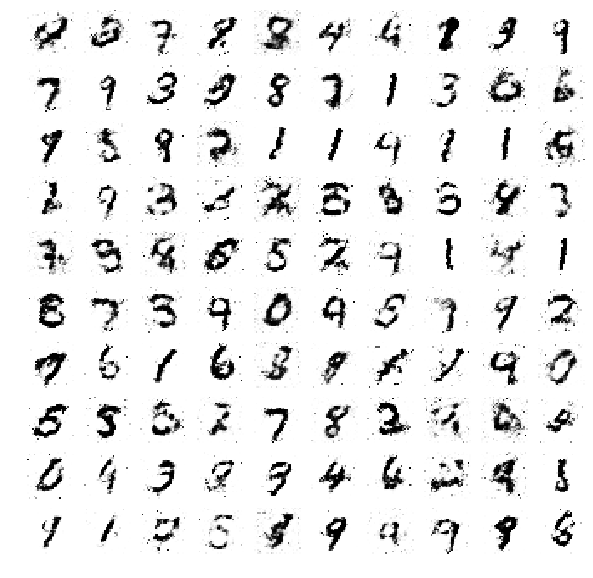

  1%|          | 4/468 [00:00<00:13, 33.20it/s]

Epochs: 11


  1%|          | 5/468 [00:00<00:11, 41.80it/s]

Epochs: 12


  1%|          | 5/468 [00:00<00:10, 42.75it/s]

Epochs: 13


  1%|          | 5/468 [00:00<00:11, 41.60it/s]

Epochs: 14


  1%|          | 5/468 [00:00<00:10, 42.30it/s]

Epochs: 15


  1%|          | 5/468 [00:00<00:11, 41.75it/s]

Epochs: 16


  1%|          | 5/468 [00:00<00:11, 40.22it/s]

Epochs: 17


  1%|          | 4/468 [00:00<00:12, 38.52it/s]

Epochs: 18


  1%|          | 5/468 [00:00<00:11, 41.67it/s]

Epochs: 19


  1%|          | 5/468 [00:00<00:11, 41.35it/s]

Epochs: 20


100%|██████████| 468/468 [00:11<00:00, 39.80it/s]


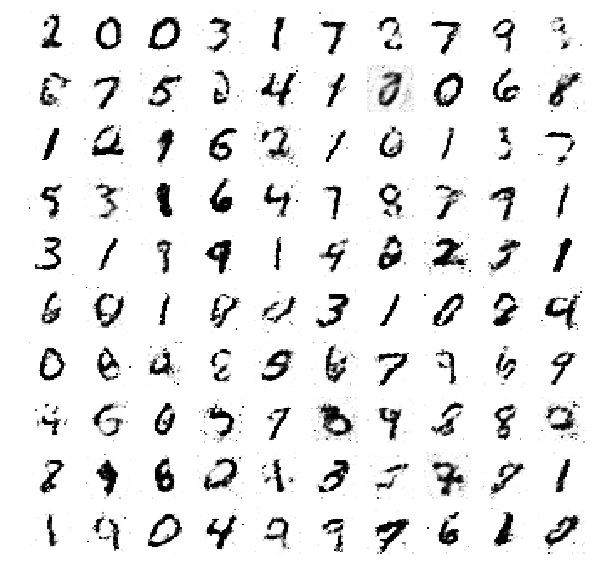

  1%|          | 3/468 [00:00<00:15, 29.98it/s]

Epochs: 21


  1%|          | 5/468 [00:00<00:11, 41.20it/s]

Epochs: 22


  1%|          | 4/468 [00:00<00:11, 39.10it/s]

Epochs: 23


  1%|          | 5/468 [00:00<00:11, 40.34it/s]

Epochs: 24


  1%|          | 4/468 [00:00<00:11, 38.95it/s]

Epochs: 25


  1%|          | 5/468 [00:00<00:11, 41.33it/s]

Epochs: 26


  1%|          | 4/468 [00:00<00:11, 38.99it/s]

Epochs: 27


  1%|          | 5/468 [00:00<00:11, 40.10it/s]

Epochs: 28


  1%|          | 5/468 [00:00<00:11, 41.09it/s]

Epochs: 29


  1%|          | 5/468 [00:00<00:11, 41.39it/s]

Epochs: 30


100%|██████████| 468/468 [00:11<00:00, 39.67it/s]


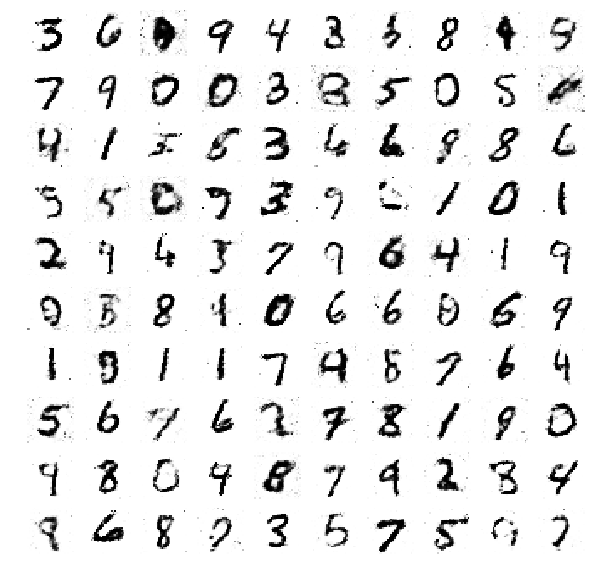

  1%|          | 4/468 [00:00<00:13, 34.46it/s]

Epochs: 31


  1%|          | 5/468 [00:00<00:11, 40.86it/s]

Epochs: 32


  1%|          | 5/468 [00:00<00:10, 43.19it/s]

Epochs: 33


  1%|          | 5/468 [00:00<00:11, 41.58it/s]

Epochs: 34


  1%|          | 4/468 [00:00<00:11, 39.01it/s]

Epochs: 35


  1%|          | 5/468 [00:00<00:10, 42.25it/s]

Epochs: 36


  1%|          | 5/468 [00:00<00:11, 41.86it/s]

Epochs: 37


  1%|          | 5/468 [00:00<00:11, 41.82it/s]

Epochs: 38


  1%|          | 4/468 [00:00<00:11, 39.18it/s]

Epochs: 39


  1%|          | 5/468 [00:00<00:11, 40.25it/s]

Epochs: 40


100%|██████████| 468/468 [00:11<00:00, 40.22it/s]


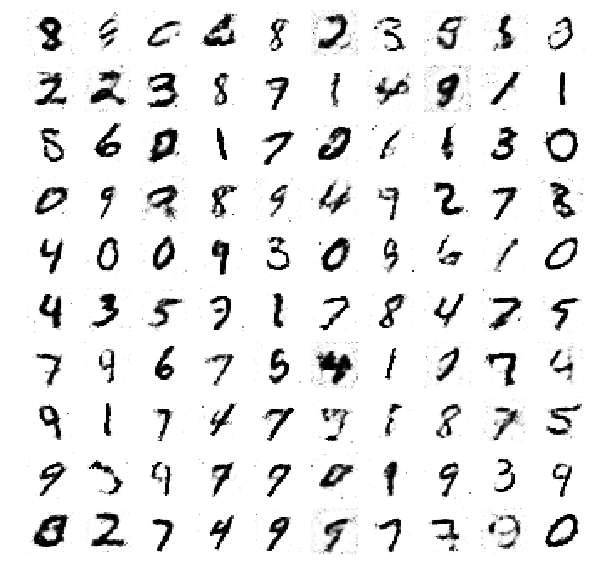

  1%|          | 3/468 [00:00<00:15, 29.68it/s]

Epochs: 41


  1%|          | 5/468 [00:00<00:11, 40.84it/s]

Epochs: 42


  1%|          | 5/468 [00:00<00:11, 40.82it/s]

Epochs: 43


  1%|          | 4/468 [00:00<00:12, 36.20it/s]

Epochs: 44


  1%|          | 4/468 [00:00<00:11, 39.48it/s]

Epochs: 45


  1%|          | 4/468 [00:00<00:11, 38.71it/s]

Epochs: 46


  1%|          | 5/468 [00:00<00:11, 42.01it/s]

Epochs: 47


  1%|          | 4/468 [00:00<00:11, 39.28it/s]

Epochs: 48


  1%|          | 5/468 [00:00<00:11, 41.37it/s]

Epochs: 49


100%|██████████| 468/468 [00:11<00:00, 40.28it/s]


In [0]:
train(50)